<a href="https://colab.research.google.com/github/Deeksha-Pandit/EVA4-S15/blob/master/Trial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as data
import torchvision
from torchvision import transforms,utils
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from torch.utils.data import Dataset, DataLoader

In [0]:
import sys
folder = '/content/gdrive/My Drive/trial'
sys.path.append(folder)

In [0]:
import train_test_loader
import Albumentationtransform
import train_test


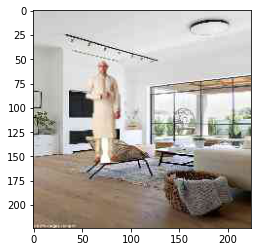

In [6]:
import matplotlib.pyplot as plt
path = '/content/gdrive/My Drive/trial/'
list1=[] 
for i in range(1,3):
  bg_new = Image.open(f'{path}Background/bg{str(i)}.jpg') #open bg image
  bg_new_data = np.asarray(bg_new) #convert to numpy array
  
  for j in range(320001,320021):
    fg_bg_new = Image.open(f'{path}Foreground-Background/fg-bg{str(j)}.jpg')
    fg_bg_new_data = np.asarray(fg_bg_new)
    fg_bg_mask_new = Image.open(f'{path}Foreground-Background-Mask/fg-bg-mask{str(j)}.jpg')
    fg_bg_mask_new_data = np.asarray(fg_bg_mask_new)
    #depth_new = Image.open(f'{path}Depth/depth{str(j)}.jpg')
    #depth_data = np.asarray(depth_new)

    list1.append([bg_new_data,fg_bg_new_data,fg_bg_mask_new_data]) 

plt.imshow(fg_bg_new_data)

In [0]:
from torch.utils.data import Dataset, random_split

def MyCustomDataset(list2,train_split = 70,test_transforms = None,train_transforms = None): 
  print("MyCustomDataset")
  #x1 = np.asarray(list2)
  x1=list2
  #print(x1) 
  train_len = len(x1)*train_split//100 
  test_len = len(x1) - train_len 
  print(len(x1))
  train_set, val_set = random_split(x1, [train_len, test_len])       #SEED
  train_dataset = DatasetFromSubset(train_set, train_transform=train_transforms, test_transform = test_transforms)
  test_dataset = DatasetFromSubset(val_set, train_transform=train_transforms, test_transform = test_transforms)
  InputData = CustomDataset(x1)
  print(type(InputData))
  return train_dataset, test_dataset

In [8]:
class CustomDataset(Dataset):  
    print("CustomDataset")
    def __init__(self,x1):
        self.data = []           
        self.target = []
        self.x1 = x1         
        print("inside",len(self.data),type(data))
  
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):    
        data = self.data[idx]
        target = self.target[idx]
        img = data     
        return data,target

CustomDataset


In [9]:
class DatasetFromSubset(Dataset):
    print("DatasetFromSubset")
    def __init__(self, subset, train_transform=None, test_transform = None):
        self.subset = subset
        self.train_transform = train_transform
        self.test_transform = test_transform

    def __getitem__(self, idx):
         x = self.subset[idx]
         if self.train_transform:
            x = self.train_transform(x)
         return x

    def __len__(self):
        return len(self.subset)


DatasetFromSubset


In [10]:
import albumentations as A
import cv2
channel_means = (0.65830478, 0.61511271, 0.5740604)
channel_stdevs = (0.24408717, 0.2542491, 0.26870159)

train_transform = Albumentationtransform.AlbumentationTransforms([       
                                                                
                             
                                      A.Resize(224,224),
                                      
                                      

                                      A.Normalize(mean=channel_means, std=channel_stdevs),
                                   
                                       ])
test_transform = Albumentationtransform.AlbumentationTransforms([       
                                                                
                             
                                      A.Resize(224,224),
                                      A.Normalize(mean=channel_means, std=channel_stdevs),

                                       ])

train_dataset , test_dataset = MyCustomDataset(list1,train_split = 70,test_transforms = test_transform,train_transforms =train_transform)

MyCustomDataset
40
inside 0 <class 'module'>
<class '__main__.CustomDataset'>


In [18]:
# print (train_dataset)
#for data in iter(train_dataset):
  # print (data[0])
#print (train_dataset[0])
#print (train_dataset[0])
#x = train_dataset[0][0]
import numpy as np
i=0
for i in range(len(list1)):
  x = list1[i][0]
  print (x.shape)
  X = x.reshape((3,x.shape[0], x.shape[1]))
  print(X.shape)
  #plt.imshow(X) 
  i=i+1


(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 224, 224)
(224, 224, 3)
(3, 22

In [10]:
print(type(list1)) 

<class 'list'>


In [0]:
trainloader, testloader = train_test_loader.load(train_dataset,test_dataset,batch_size=1)

In [0]:
# Just an eample to see if its working
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(6,16,kernel_size=5),
            nn.ReLU(True))
        self.decoder = nn.Sequential(             
            nn.ConvTranspose2d(16,6,kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(6,3,kernel_size=5),
            nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [13]:
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import torch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Autoencoder().cuda()
summary(model, input_size=(3, 244, 244))       #transfer learning for images of diff size

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 6, 240, 240]             456
              ReLU-2          [-1, 6, 240, 240]               0
            Conv2d-3         [-1, 16, 236, 236]           2,416
              ReLU-4         [-1, 16, 236, 236]               0
   ConvTranspose2d-5          [-1, 6, 240, 240]           2,406
              ReLU-6          [-1, 6, 240, 240]               0
   ConvTranspose2d-7          [-1, 3, 244, 244]             453
              ReLU-8          [-1, 3, 244, 244]               0
Total params: 5,731
Trainable params: 5,731
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.68
Forward/backward pass size (MB): 26.87
Params size (MB): 0.02
Estimated Total Size (MB): 27.57
----------------------------------------------------------------


In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay=0.005 ) 
criterion = nn.BCEWithLogitsLoss() 
scheduler = OneCycleLR(optimizer, max_lr = 0.02, total_steps=None, epochs=50, steps_per_epoch=1, pct_start=0.3, anneal_strategy='linear', cycle_momentum=False, base_momentum=0.85, max_momentum=0.95, div_factor=10.0,final_div_factor =1)

In [15]:
train_test.training(model,device,trainloader,testloader,optimizer,criterion,5,scheduler)

EPOCH: 1 LR: 0.002


ValueError: ignored